### Implementing Simple Chatbot using LangGraph

In [9]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [14]:
class State(TypedDict):
    # add_messages is a reducer. 
    # It is used to make sure that we are going to append to the list, and not overwrite the list.
    # { messages: ["message1", "message2", "message3"]}
    # Annotated adds context-specific metadata to the type. Here, we use it to specify whether a message is AI message or Human message
    messages: Annotated[list, add_messages]

In [11]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
llm.invoke("What is the weather in Hyderabad?")

AIMessage(content="I don't have real-time data access to provide current weather information. To get the latest weather updates for Hyderabad, I recommend checking a reliable weather website or using a weather app.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 14, 'total_tokens': 49, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BmC9JbLFpI5RZVZRRZKrpOLnSW8TM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6d38c2d2-39c0-4176-aa20-81304c2f7a14-0', usage_metadata={'input_tokens': 14, 'output_tokens': 35, 'total_tokens': 49, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="qwen-2.5-32b", temperature=0)
llm_groq.invoke("What is the weather in Hyderabad?")

GroqError: The api_key client option must be set either by passing api_key to the client or by setting the GROQ_API_KEY environment variable

### Creating nodes

In [24]:
def superbot(state: State):
    return {"messages": [llm.invoke(state['messages'])]}

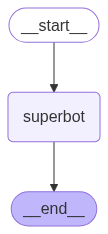

In [25]:
graph = StateGraph(State)

graph.add_node("superbot", superbot)

graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder = graph.compile()

from IPython.display import Image, display

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [27]:
## Invocation

graph_builder.invoke({"messages": ["Hi, my name is Satya. I like cricket."]})


{'messages': [HumanMessage(content='Hi, my name is Satya. I like cricket.', additional_kwargs={}, response_metadata={}, id='986335f2-7a0b-4c53-9f36-665e6670255d'),
  AIMessage(content="Hi Satya! It's great to meet you. Cricket is an exciting sport with a rich history. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 19, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_62a23a81ef', 'id': 'chatcmpl-BmCFCtNx0dJ354PmEvd01FPsl1Q04', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4a42d682-65b2-400c-939f-516d6a8cd744-0', usage_metadata={'input_tokens': 19, 'output_tokens': 29, 'total_tokens': 48, 'input_token_details'

In [ ]:
## Streaming the responses

for event in graph_builder.stream({"messages": [{"role": "user", "content": "Hi, my name is Satya. I like cricket."}]}, stream_mode="values"):
    print(event)

{'superbot': {'messages': [AIMessage(content="Hi Satya! It's great to meet you. Cricket is an exciting sport with a rich history. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 19, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BmCI9nCUWxAVhbJ8LQorF64tJMNnv', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3121b35d-6fb3-459d-8b7a-7834683e9a42-0', usage_metadata={'input_tokens': 19, 'output_tokens': 29, 'total_tokens': 48, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [ ]:
# This only prints the recent llm response.
for event in graph_builder.stream({"messages": [{"role": "user", "content": "Hi, my name is Satya. I like cricket."}]}, stream_mode="updates"):
    print(event)

{'superbot': {'messages': [AIMessage(content="Hi Satya! It's great to meet you. Cricket is an exciting sport with a rich history. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 19, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BmCJFbbS6sPyqK3OunJ90fpZuVhNF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6fb543d7-752d-4e0b-8112-23fdfed18e7a-0', usage_metadata={'input_tokens': 19, 'output_tokens': 29, 'total_tokens': 48, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
